# Create a map of FUA location

Shows all FUAs used in the study on a map to be shown in the paper.

In [1]:
import geopandas
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from palettable.cartocolors.qualitative import Bold_6
from matplotlib.lines import Line2D

Set default plotting theme.

In [2]:
sns.set_theme(
    context="paper",
    style="ticks",
    rc={
        "patch.force_edgecolor": False,
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.grid": True,
    },
    palette=Bold_6.hex_colors,
)

coldict = {
    "Africa": 0,
    "Asia": 1,
    "Europe": 2,
    "North America": 3,
    "Oceania": 4,
    "South America": 5,
}

Load the data with continent land masses. Project to Robinson.

In [6]:
world = geopandas.read_file("https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip").to_crs(
    "ESRI:54030"
)

Load FUA samples.

In [4]:
sample = geopandas.read_parquet("../data/sample.parquet").to_crs("ESRI:54030")

Use centroid instead of polygons.

In [5]:
sample = sample.set_geometry(sample.centroid)

Plot using the color schema set for continents.

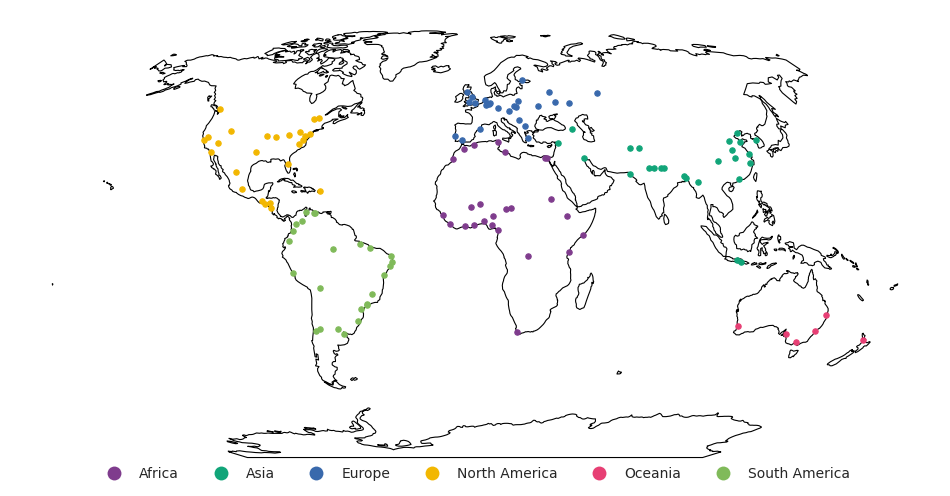

In [8]:
ax = world.plot(facecolor="none", edgecolor="k", figsize=(12, 12))
legend_patches = []
for cont, col in coldict.items():
    sample.query(f"continent == '{cont}'").plot(
        color=Bold_6.hex_colors[col],
        ax=ax,
        markersize=15,
    )
    legend_patches.append(
        Line2D(
            [0],
            [0],
            linestyle="none",
            marker="o",
            markersize=10,
            markerfacecolor=Bold_6.hex_colors[col],
            markeredgewidth=0,
        )
    )
ax.set_axis_off()
ax.legend(
    labels=coldict.keys(),
    handles=legend_patches,
    loc="lower center",
    ncols=6,
    frameon=False,
    bbox_to_anchor=(0.5, -0.03),
    fontsize=10,
)
for ext in ["png", "svg", "pdf"]:
    plt.savefig(f"../plots/cities/fua_locations.{ext}", dpi=300, bbox_inches="tight")